<a href="https://colab.research.google.com/github/vedashrith/Data-Science/blob/main/AutoimportsAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook.

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

#CREDIT SCORING FOR LOAN APPROVAL:

To sanction loan to customers such as education loan, car loan, home loan, buisness loan etc., various aspects(features) are considered such as income, credit history, other debts, debt to income ratio, movable assets, immovable assets, how frequently the EMI is paid, Grades(For education loan) such as English test, GRE, High School, Undergrad etc., The dataset included a wide range of features related to applicants. To automate this process for faster processing of applications the model needs the dimensions of the dataset to be reduced. There maybe irrelevant features or unnecessary noise to the credit scoring model. Such features might affect the model's accuracy and performance in predicting the customer's credit worthiness. Such features need to be eliminated or identify the relevant features to improve the accuracy and performance of the model. This is essential to make decisions to approve or deny a loan. Also feature reduction helps save the cost of implementing the model. We can use Feature selection and reduction techniques such as Filter methods, Wrapper methods, Embedded methods or PCA for variable selection and contribute to model's accuracy and performance.

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were:
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('df2.csv') # df2 from the last homework is saved as csv file and imported here

In [ ]:
df.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


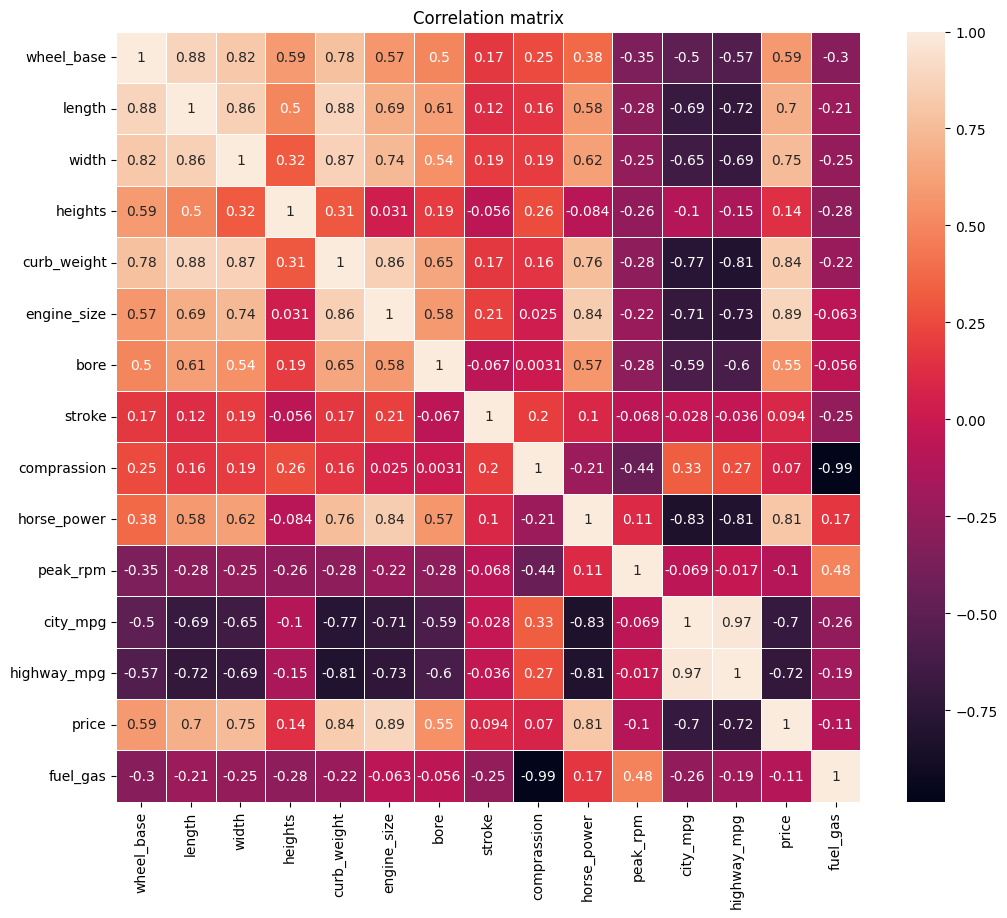

In [ ]:
#Correlation matrix with heatmap

cm = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(cm , annot = True, linewidths = .5)
plt.title('Correlation matrix')
plt.show()

A correlation matrix is created for the features to know how correlated the features are with each other.

In [ ]:
#Feature selection based on correlation matrix

thresh = 0.8
high_corr = set()

for i in range(len(cm.columns)):
  for j in range(i):
    if abs(cm.iloc[i, j]) > thresh:
            col = cm.columns[i]
            high_corr.add(col)

print("Highly correlated features:", high_corr)

df_filtered = df.drop(columns=high_corr)
df_filtered.info()

Highly correlated features: {'curb_weight', 'price', 'width', 'length', 'highway_mpg', 'fuel_gas', 'horse_power', 'engine_size', 'city_mpg'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel_base   195 non-null    float64
 1   heights      195 non-null    float64
 2   bore         195 non-null    float64
 3   stroke       195 non-null    float64
 4   comprassion  195 non-null    float64
 5   peak_rpm     195 non-null    float64
dtypes: float64(6)
memory usage: 9.3 KB


A correlation threshold is set for 0.8. any feature exceeding this limit is dropped from the dataframe. After dropping the correlated features we are left with only 6 features. This proves that we need another method to select the features.

In [ ]:
# SelectKBest

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression


X = df.drop('price', axis=1)
y = df['price']

k_best = SelectKBest(f_regression, k='all')

X_best = k_best.fit_transform(X, y)

# Get the k-scores and p-values
k_scores = k_best.scores_
p_values = k_best.pvalues_

feature_scores = pd.DataFrame({'Feature': X.columns, 'K-Score': k_scores, 'P-Value': p_values})
feature_scores = feature_scores.sort_values(by='K-Score', ascending=False)
print(feature_scores)

selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]

model = LinearRegression()
model.fit(X_best, y)

coefficients = model.coef_
intercept = model.intercept_

print("selected features: ", selected_features)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

        Feature     K-Score       P-Value
5   engine_size  727.004144  2.289298e-67
4   curb_weight  447.012802  3.932342e-52
9   horse_power  370.939205  8.142859e-47
2         width  254.721384  4.106033e-37
12  highway_mpg  202.547489  6.736741e-32
11     city_mpg  188.246620  2.395989e-30
1        length  180.658052  1.684866e-29
0    wheel_base  100.828046  2.354900e-19
6          bore   82.348461  1.328139e-16
3       heights    3.762957  5.385731e-02
13     fuel_gas    2.319209  1.294218e-01
10     peak_rpm    2.124014  1.466312e-01
7        stroke    1.711199  1.923857e-01
8   comprassion    0.936769  3.343216e-01
selected features:  Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_gas'],
      dtype='object')
Intercept: -44499.494317633136
Coefficients: [ 3.95305120e+01 -6.06332818e+01  6.03641360e+02  3.29566909e+02
  1.17984542e+00  1.384

In this code, We use SelectKbest univariate feature selection method to perform feature selection with f_regression as scoring function. The variable X consists of all predicting features and Y is the target variable. k_best.fit_transform(X, y) fits the SelectKBest model on the features X and target y and transforms the feature set based on the selected features. After model fitting we generate k score and sort the features based on the scores we can drop the features with less scores such as heights, fuel_gas, peak_rpm, stroke, comprassion. Overall, this approach seems better than correlation matrix with heatmap.

### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

Selected Features: Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size',
       'comprassion', 'horse_power', 'peak_rpm', 'highway_mpg'],
      dtype='object')


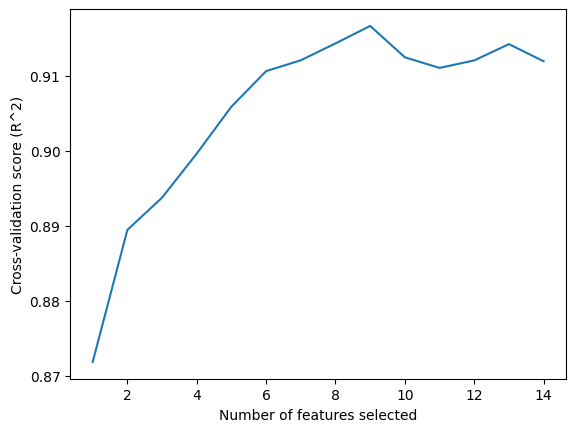

Feature Coefficients: [0.01367077 0.01059843 0.01940015 0.2245229  0.64436219 0.0102697
 0.02535745 0.00951599 0.04230241]


In [ ]:
#Recursive Feature Elimiation using Cross-Validation

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable


model = RandomForestRegressor()


kf = KFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=kf, scoring='r2')

rfecv.fit(X, y)


selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (R^2)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

model.fit(X[selected_features], y)


feature_coeff = model.feature_importances_
print("Feature Coefficients:", feature_coeff)

In Wrapper methods, The Recursive Feature elimination with Cross validations seems to be the best approach after reviewing the advantages and limitaions of other wrapper methods.  
In this method we use random forest regressor as our reression model. The number folds is set to 5 and fitted to the model.
Now the RFCEV model selects the features by recursively eliminating the features based on the cross-validation. The selected features are: Selected Features: 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_gas'.  
A graph between number of features selected vs the cross validation score is also plotted to get clear understanding in this method.

### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

In [ ]:
#Elastic Net

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


elasticnet = ElasticNetCV(cv=5)  # 5-fold cross-validation


elasticnet.fit(X_train_scaled, y_train)


coefficients = pd.Series(elasticnet.coef_, index=X.columns)
selected_features = coefficients[coefficients != 0].index
print("Selected Features:", selected_features)
print("Coefficients:\n", coefficients )

performance = elasticnet.score(X_test_scaled, y_test)
print("Model Performance (R^2):", performance)


Selected Features: Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_gas'],
      dtype='object')
Coefficients:
 wheel_base     252.778758
length         337.797178
width          412.430544
heights         10.103959
curb_weight    481.614237
engine_size    556.524281
bore           233.986800
stroke          11.417227
comprassion    130.391876
horse_power    510.309818
peak_rpm       -25.612696
city_mpg      -368.941234
highway_mpg   -368.475774
fuel_gas      -135.222399
dtype: float64
Model Performance (R^2): 0.48425985212919176


Elastic Net is better a approach than Lasso and Ridge since it uses the both methods as well as eliminating their drawbacks. Elastic Net is a linear regression model that combines L1 and L2 penalties of the Lasso and Ridge methods. For feature selection using Elastic Net, we can use its ability to shrink coefficients, making some of them effectively zero, effectively performing feature selection.  
In this method we have to split the data into train and test datasets. Standardize the features, Fit the model and select the features based on the coefficients. The Selected features are:'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_gas'.

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

From the above outputs in each category it's clear that the SelectKbest and Elasticnet selects the same features whereas Recursive Feature elimination with CV eliminates 5 more features. In my opinion we consider the elasticnet feature reduction method since selectKbest is just like a preprocessing step however it yields the same results. The RFECV yields few less number of features.  
The full linear regression model from the previous homework uses all features so it explains the 80.8% variance in the data. The coefficients in the data vary across all the models due to different selection criteria. The full model and Elasticnet has larger coefficients compared to SelectKbest and RFECV. The full model has high multicollinearity. so, it is recommended to reduce the features based on feature selection methods preferably Elasticnet method.

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_pca_components = 8
pca = PCA(n_components=num_pca_components)
pca.fit(X_train)


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


model = LinearRegression()
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Root Mean Squared Error (RMSE): 4489.913465556267
Intercept: 12757.128205128205
Coefficients: [   8.87040791    8.20874828   75.25231622  -53.84884379   -6.01205191
  131.06887671  -69.91189941 -256.11798032]


PCA is performed the dataset to reduce features. Firstly, the PCA initialized with 8 principal components and then the PCA is fitted on the training data to learn the transformation. Both the train and test data are transformed to reduce their dimensions. Next, regression model is fitted and predictions are made using test data. The Root mean squared error is calculated as 4489.913 to evaluate the model's performance. It is the average deviation between the residuals(predicted and observed values). The intercept is 12757.128 which is the value of price when all predictors are set to 0. The Coefficients are generated for each principal component. So there are 8 coefficients showing how each feature impacts on the price of the automobile.